In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nibabel as nib
%load_ext autoreload
%matplotlib inline
%autoreload 2 

df=pd.DataFrame(
    {'atlas': ['mebrains', 'yerkes19', 'd99', 'f99', 'nmt'],
    'hemishphere': ['left', 'left', 'left', 'left', 'left'],
    'mid': ['data/mebrains/surfaces/lh.MEBRAINS.mid.surf.gii', 
             'data/yerkes/surfaces/MacaqueYerkes19.L.mid.32k_fs_LR.surf.gii', 
             'data/d99/surfaces/D99_L_AVG_T1_v2.L.MID.167625.surf.gii',
             'data/f99/lh.rmac.midthickness.32k.surf.gii',
             'data/nmt2.0/surfaces/NMT_v2.0_sym_lh.mid_surface.rsl.gii'
             ],
    'n_curv': [225, 10, 10, 40, 10],
    'n_sulc': [20, 10, 10, 10, 10]
    }
)

df['n_vertices'] = [ nib.load(f).darrays[0].data.shape[0] for f in df['mid'] ]
print(df)

      atlas hemishphere                                                mid  \
0  mebrains        left    data/mebrains/surfaces/lh.MEBRAINS.mid.surf.gii   
1  yerkes19        left  data/yerkes/surfaces/MacaqueYerkes19.L.mid.32k...   
2       d99        left  data/d99/surfaces/D99_L_AVG_T1_v2.L.MID.167625...   
3       f99        left         data/f99/lh.rmac.midthickness.32k.surf.gii   
4       nmt        left  data/nmt2.0/surfaces/NMT_v2.0_sym_lh.mid_surfa...   

   n_curv  n_sulc  n_vertices  
0     225      20      100988  
1      10      10       32492  
2      10      10      167625  
3      40      10       32492  
4      10      10       40962  


In [2]:
# Convert Freesurfer surfaces to GIFTI format

import os
import shutil
import subprocess
import nibabel as nib

output_dir = 'output/gifti/'
os.makedirs(output_dir, exist_ok=True)

for i, row in df.iterrows():
    output_fn = f'{output_dir}/{os.path.basename(row["mid"])}'
    try :
        nib.load( row['mid'] )
        shutil.copy(row['mid'], output_fn)
    except Exception as e:
        print('Converting', row['mid'])
        subprocess.run(f"mris_convert -n {output_fn} {row['mid']}", shell=True, executable='/bin/bash')



mris_inflate -n 1 data/mebrains/surfaces/lh.MEBRAINS.mid.surf.gii output/spheres/lh.MEBRAINS.mid.inflated
Reading data/mebrains/surfaces/lh.MEBRAINS.mid.surf.gii


niterations = 1
avg radius = 19.8 mm, total surface area = 10992 mm^2


step 005: RMS=0.088 (target=0.015)   
inflation complete.
mris_inflate utimesec    1.241429
mris_inflate stimesec    0.097583
mris_inflate ru_maxrss   184780
mris_inflate ru_ixrss    0
mris_inflate ru_idrss    0
mris_inflate ru_isrss    0
mris_inflate ru_minflt   74215
mris_inflate ru_majflt   21
mris_inflate ru_nswap    0
mris_inflate ru_inblock  4672
mris_inflate ru_oublock  0
mris_inflate ru_msgsnd   0
mris_inflate ru_msgrcv   0
mris_inflate ru_nsignals 0
mris_inflate ru_nvcsw    2169
mris_inflate ru_nivcsw   38


writing inflated surface to output/spheres/lh.MEBRAINS.mid.inflated
writing sulcal depths to output/spheres/lh.sulc
inflation took 0.0 minutes
doing quick spherical unfolding.


mris_sphere -q output/spheres/lh.MEBRAINS.mid.inflated output/spheres/lh.MEBRAINS.mid.sphere
version: 7.2.0
available threads: 1
scaling brain by 0.987...


inflating...
projecting onto sphere...
surface projected - minimizing metric distortion...
vertex spacing 1.20 +- 0.62 (0.00-->5.64) (max @ vno 69679 --> 70404)
face area 0.05 +- 0.05 (-0.02-->0.86)


Entering MRISinflateToSphere()
inflating to sphere (rms error < 2.00)
000: dt: 0.0000, rms radial error=179.651, avgs=0
005/300: dt: 0.9000, rms radial error=179.419, avgs=0
010/300: dt: 0.9000, rms radial error=178.912, avgs=0
015/300: dt: 0.9000, rms radial error=178.223, avgs=0
020/300: dt: 0.9000, rms radial error=177.419, avgs=0
025/300: dt: 0.9000, rms radial error=176.543, avgs=0
030/300: dt: 0.9000, rms radial error=175.634, avgs=0
035/300: dt: 0.9000, rms radial error=174.703, avgs=0
040/300: dt: 0.9000, rms radial error=173.761, avgs=0
045/300: dt: 0.9000, rms radial error=172.811, avgs=0
050/300: dt: 0.9000, rms radial error=171.856, avgs=0
055/300: dt: 0.9000, rms radial error=170.899, avgs=0
060/300: dt: 0.9000, rms radial error=169.944, avgs=0
065/300: dt: 0.9000, rms radial error=168.995, avgs=0
070/300: dt: 0.9000, rms radial error=168.052, avgs=0
075/300: dt: 0.9000, rms radial error=167.112, avgs=0
080/300: dt: 0.9000, rms radial error=166.176, avgs=0
085/300: dt: 0.9

writing spherical brain to output/spheres/lh.MEBRAINS.mid.sphere
spherical transformation took 0.0169 hours


Saving output/spheres/lh.MEBRAINS.mid.sphere.gii as a surface
.sphere
.gii
mris_inflate -n 1 data/yerkes/surfaces/MacaqueYerkes19.L.mid.32k_fs_LR.surf.gii output/spheres/MacaqueYerkes19.L.mid.32k_fs_LR.inflated
Reading data/yerkes/surfaces/MacaqueYerkes19.L.mid.32k_fs_LR.surf.gii


niterations = 1
** DA[1] has coordsys with intent NIFTI_INTENT_TRIANGLE (should be NIFTI_INTENT_POINTSET)
avg radius = 18.5 mm, total surface area = 11428 mm^2


step 005: RMS=0.115 (target=0.015)   
inflation complete.
mris_inflate utimesec    0.348268
mris_inflate stimesec    0.055882
mris_inflate ru_maxrss   287636
mris_inflate ru_ixrss    0
mris_inflate ru_idrss    0
mris_inflate ru_isrss    0
mris_inflate ru_minflt   32053
mris_inflate ru_majflt   0
mris_inflate ru_nswap    0
mris_inflate ru_inblock  0
mris_inflate ru_oublock  0
mris_inflate ru_msgsnd   0
mris_inflate ru_msgrcv   0
mris_inflate ru_nsignals 0
mris_inflate ru_nvcsw    813
mris_inflate ru_nivcsw   3
mris_sphere -q output/spheres/MacaqueYerkes19.L.mid.32k_fs_LR.inflated output/spheres/MacaqueYerkes19.L.mid.32k_fs_LR.sphere
version: 7.2.0
available threads: 1
scaling brain by 0.926...


writing inflated surface to output/spheres/MacaqueYerkes19.L.mid.32k_fs_LR.inflated
writing sulcal depths to output/spheres/rh.sulc
inflation took 0.0 minutes
doing quick spherical unfolding.
inflating...
projecting onto sphere...
surface projected - minimizing metric distortion...
vertex spacing 2.12 +- 0.40 (0.70-->3.25) (max @ vno 708 --> 752)
face area 0.15 +- 0.05 (0.02-->0.30)


Entering MRISinflateToSphere()
inflating to sphere (rms error < 2.00)
000: dt: 0.0000, rms radial error=180.419, avgs=0
005/300: dt: 0.9000, rms radial error=180.187, avgs=0
010/300: dt: 0.9000, rms radial error=179.682, avgs=0
015/300: dt: 0.9000, rms radial error=179.002, avgs=0
020/300: dt: 0.9000, rms radial error=178.188, avgs=0
025/300: dt: 0.9000, rms radial error=177.283, avgs=0
030/300: dt: 0.9000, rms radial error=176.326, avgs=0
035/300: dt: 0.9000, rms radial error=175.345, avgs=0
040/300: dt: 0.9000, rms radial error=174.367, avgs=0
045/300: dt: 0.9000, rms radial error=173.396, avgs=0
050/300: dt: 0.9000, rms radial error=172.429, avgs=0
055/300: dt: 0.9000, rms radial error=171.466, avgs=0
060/300: dt: 0.9000, rms radial error=170.505, avgs=0
065/300: dt: 0.9000, rms radial error=169.550, avgs=0
070/300: dt: 0.9000, rms radial error=168.603, avgs=0
075/300: dt: 0.9000, rms radial error=167.666, avgs=0
080/300: dt: 0.9000, rms radial error=166.739, avgs=0
085/300: dt: 0.9

writing spherical brain to output/spheres/MacaqueYerkes19.L.mid.32k_fs_LR.sphere
spherical transformation took 0.0037 hours


mris_inflate -n 1 data/d99/surfaces/D99_L_AVG_T1_v2.L.MID.167625.surf.gii output/spheres/D99_L_AVG_T1_v2.L.MID.167625.inflated
Reading data/d99/surfaces/D99_L_AVG_T1_v2.L.MID.167625.surf.gii


niterations = 1
avg radius = 19.9 mm, total surface area = 14511 mm^2


step 005: RMS=0.111 (target=0.015)   

writing inflated surface to output/spheres/D99_L_AVG_T1_v2.L.MID.167625.inflated
writing sulcal depths to output/spheres/rh.sulc
inflation took 0.0 minutes



inflation complete.
mris_inflate utimesec    2.354011
mris_inflate stimesec    0.168645
mris_inflate ru_maxrss   306348
mris_inflate ru_ixrss    0
mris_inflate ru_idrss    0
mris_inflate ru_isrss    0
mris_inflate ru_minflt   124067
mris_inflate ru_majflt   2
mris_inflate ru_nswap    0
mris_inflate ru_inblock  344
mris_inflate ru_oublock  0
mris_inflate ru_msgsnd   0
mris_inflate ru_msgrcv   0
mris_inflate ru_nsignals 0
mris_inflate ru_nvcsw    3529
mris_inflate ru_nivcsw   76
mris_sphere -q output/spheres/D99_L_AVG_T1_v2.L.MID.167625.inflated output/spheres/D99_L_AVG_T1_v2.L.MID.167625.sphere
version: 7.2.0
available threads: 1


doing quick spherical unfolding.


scaling brain by 0.915...


inflating...
projecting onto sphere...
surface projected - minimizing metric distortion...
vertex spacing 0.89 +- 0.63 (0.00-->7.63) (max @ vno 98006 --> 99270)
face area 0.04 +- 0.05 (-0.01-->1.44)


Entering MRISinflateToSphere()
inflating to sphere (rms error < 2.00)
000: dt: 0.0000, rms radial error=180.505, avgs=0
005/300: dt: 0.9000, rms radial error=180.301, avgs=0
010/300: dt: 0.9000, rms radial error=179.835, avgs=0
015/300: dt: 0.9000, rms radial error=179.199, avgs=0
020/300: dt: 0.9000, rms radial error=178.449, avgs=0
025/300: dt: 0.9000, rms radial error=177.634, avgs=0
030/300: dt: 0.9000, rms radial error=176.794, avgs=0
035/300: dt: 0.9000, rms radial error=175.944, avgs=0
040/300: dt: 0.9000, rms radial error=175.087, avgs=0
045/300: dt: 0.9000, rms radial error=174.223, avgs=0
050/300: dt: 0.9000, rms radial error=173.349, avgs=0
055/300: dt: 0.9000, rms radial error=172.475, avgs=0
060/300: dt: 0.9000, rms radial error=171.607, avgs=0
065/300: dt: 0.9000, rms radial error=170.742, avgs=0
070/300: dt: 0.9000, rms radial error=169.881, avgs=0
075/300: dt: 0.9000, rms radial error=169.026, avgs=0
080/300: dt: 0.9000, rms radial error=168.175, avgs=0
085/300: dt: 0.9

writing spherical brain to output/spheres/D99_L_AVG_T1_v2.L.MID.167625.sphere
spherical transformation took 0.0267 hours


Saving output/spheres/D99_L_AVG_T1_v2.L.MID.167625.sphere.gii as a surface
.sphere
.gii
mris_inflate -n 1 data/f99/lh.rmac.midthickness.32k.surf.gii output/spheres/lh.rmac.midthickness.32k.inflated
Reading data/f99/lh.rmac.midthickness.32k.surf.gii


niterations = 1
avg radius = 20.3 mm, total surface area = 12714 mm^2


step 005: RMS=0.137 (target=0.015)   
inflation complete.
mris_inflate utimesec    0.382307
mris_inflate stimesec    0.036741
mris_inflate ru_maxrss   442552
mris_inflate ru_ixrss    0
mris_inflate ru_idrss    0
mris_inflate ru_isrss    0
mris_inflate ru_minflt   32059
mris_inflate ru_majflt   0
mris_inflate ru_nswap    0
mris_inflate ru_inblock  0
mris_inflate ru_oublock  0
mris_inflate ru_msgsnd   0
mris_inflate ru_msgrcv   0
mris_inflate ru_nsignals 0
mris_inflate ru_nvcsw    881
mris_inflate ru_nivcsw   16
mris_sphere -q output/spheres/lh.rmac.midthickness.32k.inflated output/spheres/lh.rmac.midthickness.32k.sphere
version: 7.2.0
available threads: 1
scaling brain by 0.843...


writing inflated surface to output/spheres/lh.rmac.midthickness.32k.inflated
writing sulcal depths to output/spheres/lh.sulc
inflation took 0.0 minutes
doing quick spherical unfolding.
inflating...
projecting onto sphere...
surface projected - minimizing metric distortion...
vertex spacing 2.12 +- 0.44 (0.68-->3.34) (max @ vno 707 --> 751)
face area 0.14 +- 0.05 (0.02-->0.29)


Entering MRISinflateToSphere()
inflating to sphere (rms error < 2.00)
000: dt: 0.0000, rms radial error=180.210, avgs=0
005/300: dt: 0.9000, rms radial error=179.960, avgs=0
010/300: dt: 0.9000, rms radial error=179.416, avgs=0
015/300: dt: 0.9000, rms radial error=178.676, avgs=0
020/300: dt: 0.9000, rms radial error=177.792, avgs=0
025/300: dt: 0.9000, rms radial error=176.832, avgs=0
030/300: dt: 0.9000, rms radial error=175.835, avgs=0
035/300: dt: 0.9000, rms radial error=174.823, avgs=0
040/300: dt: 0.9000, rms radial error=173.822, avgs=0
045/300: dt: 0.9000, rms radial error=172.831, avgs=0
050/300: dt: 0.9000, rms radial error=171.856, avgs=0
055/300: dt: 0.9000, rms radial error=170.888, avgs=0
060/300: dt: 0.9000, rms radial error=169.929, avgs=0
065/300: dt: 0.9000, rms radial error=168.984, avgs=0
070/300: dt: 0.9000, rms radial error=168.045, avgs=0
075/300: dt: 0.9000, rms radial error=167.113, avgs=0
080/300: dt: 0.9000, rms radial error=166.189, avgs=0
085/300: dt: 0.9

writing spherical brain to output/spheres/lh.rmac.midthickness.32k.sphere
spherical transformation took 0.0038 hours


mris_inflate -n 1 data/nmt2.0/surfaces/NMT_v2.0_sym_lh.mid_surface.rsl.gii output/spheres/NMT_v2.0_sym_lh.mid_surface.rsl.gii.inflated
Reading data/nmt2.0/surfaces/NMT_v2.0_sym_lh.mid_surface.rsl.gii


niterations = 1
avg radius = 19.9 mm, total surface area = 10933 mm^2


step 005: RMS=0.119 (target=0.015)   
inflation complete.
mris_inflate utimesec    0.558404
mris_inflate stimesec    0.078915
mris_inflate ru_maxrss   461116
mris_inflate ru_ixrss    0
mris_inflate ru_idrss    0
mris_inflate ru_isrss    0
mris_inflate ru_minflt   40746
mris_inflate ru_majflt   0
mris_inflate ru_nswap    0
mris_inflate ru_inblock  0
mris_inflate ru_oublock  0
mris_inflate ru_msgsnd   0
mris_inflate ru_msgrcv   0
mris_inflate ru_nsignals 0
mris_inflate ru_nvcsw    1053
mris_inflate ru_nivcsw   44
mris_sphere -q output/spheres/NMT_v2.0_sym_lh.mid_surface.rsl.gii.inflated output/spheres/NMT_v2.0_sym_lh.mid_surface.rsl.gii.sphere
version: 7.2.0
available threads: 1


writing inflated surface to output/spheres/NMT_v2.0_sym_lh.mid_surface.rsl.gii.inflated
writing sulcal depths to output/spheres/rh.sulc
inflation took 0.0 minutes
doing quick spherical unfolding.
inflating...


scaling brain by 0.938...


projecting onto sphere...
surface projected - minimizing metric distortion...
vertex spacing 1.87 +- 0.45 (0.58-->3.45) (max @ vno 40461 --> 40464)
face area 0.12 +- 0.05 (0.01-->0.28)


Entering MRISinflateToSphere()
inflating to sphere (rms error < 2.00)
000: dt: 0.0000, rms radial error=178.840, avgs=0
005/300: dt: 0.9000, rms radial error=178.601, avgs=0
010/300: dt: 0.9000, rms radial error=178.087, avgs=0
015/300: dt: 0.9000, rms radial error=177.382, avgs=0
020/300: dt: 0.9000, rms radial error=176.558, avgs=0
025/300: dt: 0.9000, rms radial error=175.653, avgs=0
030/300: dt: 0.9000, rms radial error=174.741, avgs=0
035/300: dt: 0.9000, rms radial error=173.829, avgs=0
040/300: dt: 0.9000, rms radial error=172.908, avgs=0
045/300: dt: 0.9000, rms radial error=171.985, avgs=0
050/300: dt: 0.9000, rms radial error=171.061, avgs=0
055/300: dt: 0.9000, rms radial error=170.141, avgs=0
060/300: dt: 0.9000, rms radial error=169.231, avgs=0
065/300: dt: 0.9000, rms radial error=168.329, avgs=0
070/300: dt: 0.9000, rms radial error=167.429, avgs=0
075/300: dt: 0.9000, rms radial error=166.532, avgs=0
080/300: dt: 0.9000, rms radial error=165.638, avgs=0
085/300: dt: 0.9

writing spherical brain to output/spheres/NMT_v2.0_sym_lh.mid_surface.rsl.gii.sphere
spherical transformation took 0.0049 hours


Saving output/spheres/NMT_v2.0_sym_lh.mid_surface.rsl.gii.sphere.gii as a surface
.sphere
.gii


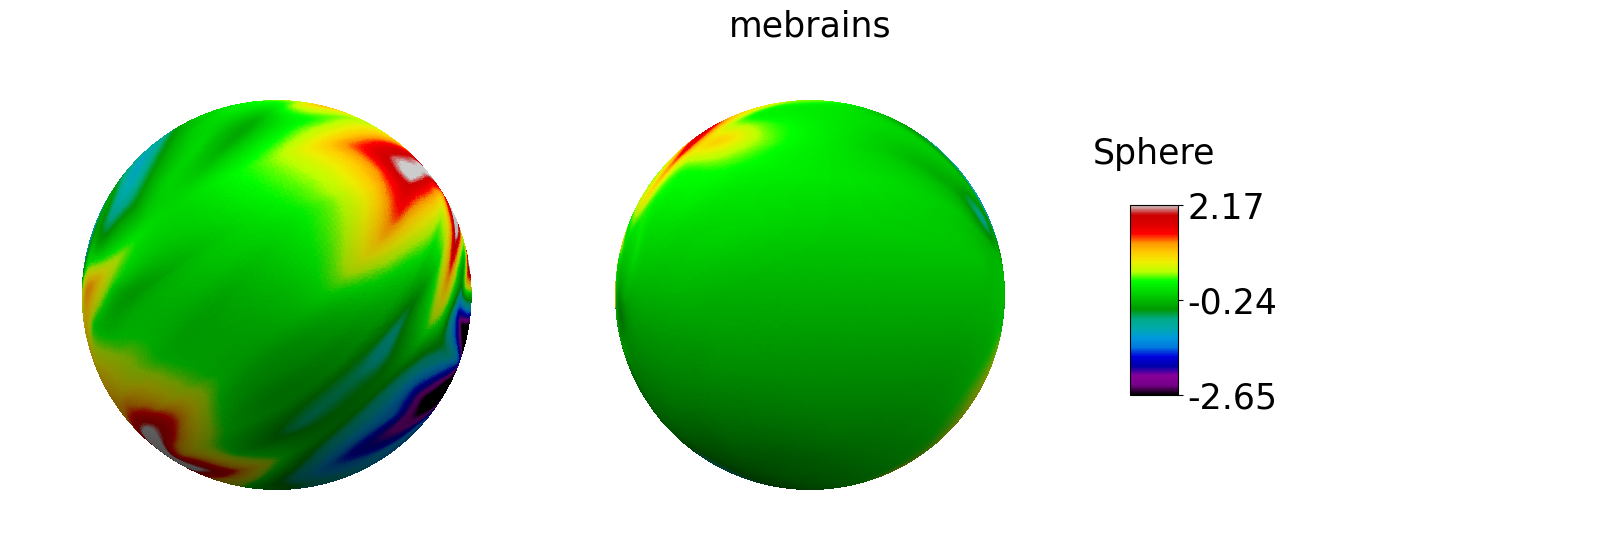

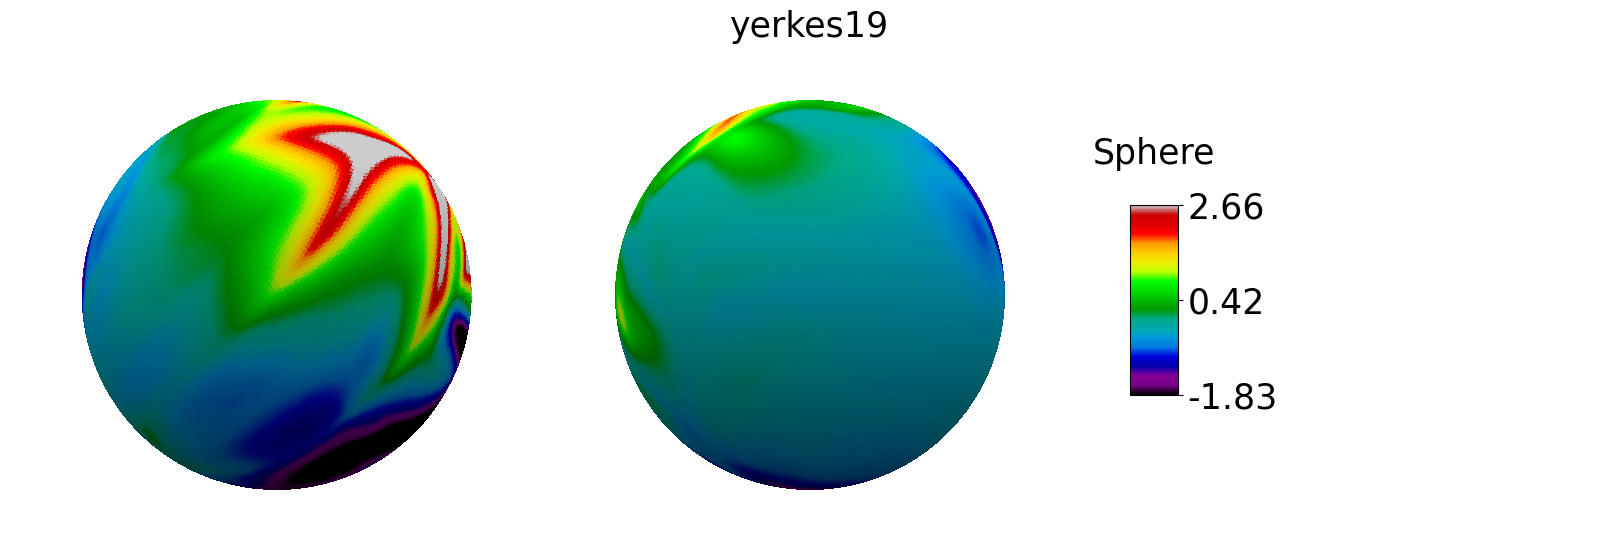

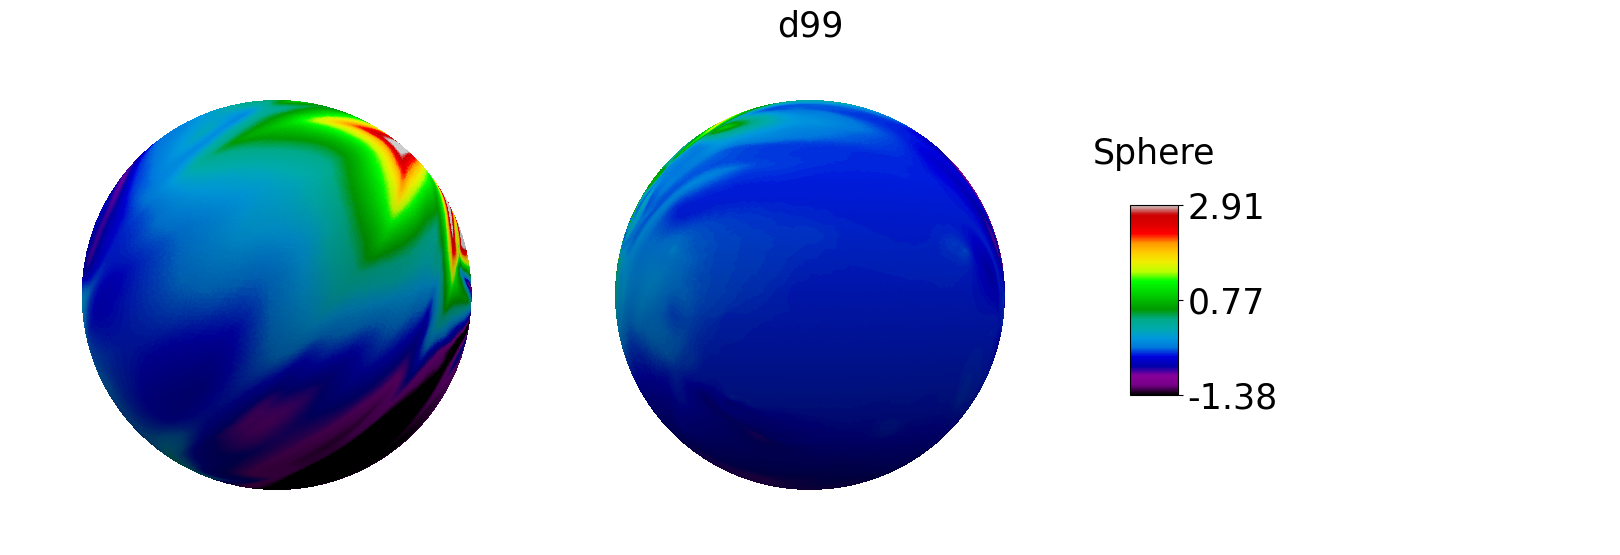

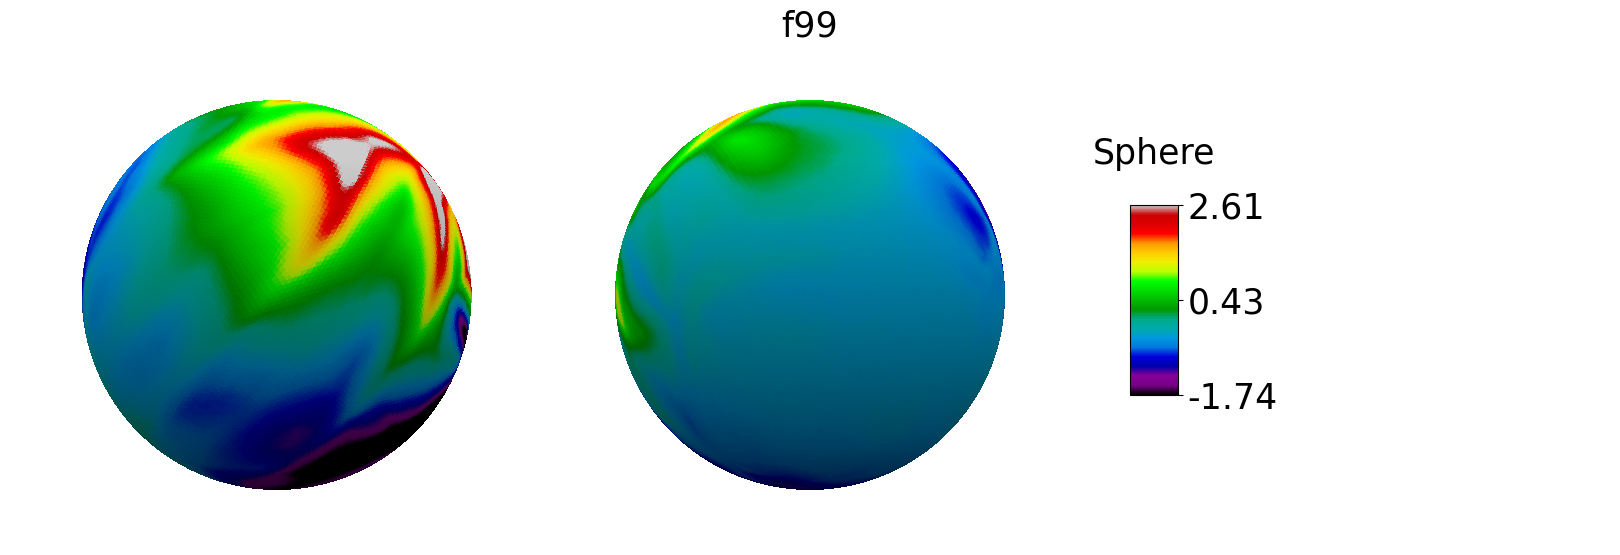

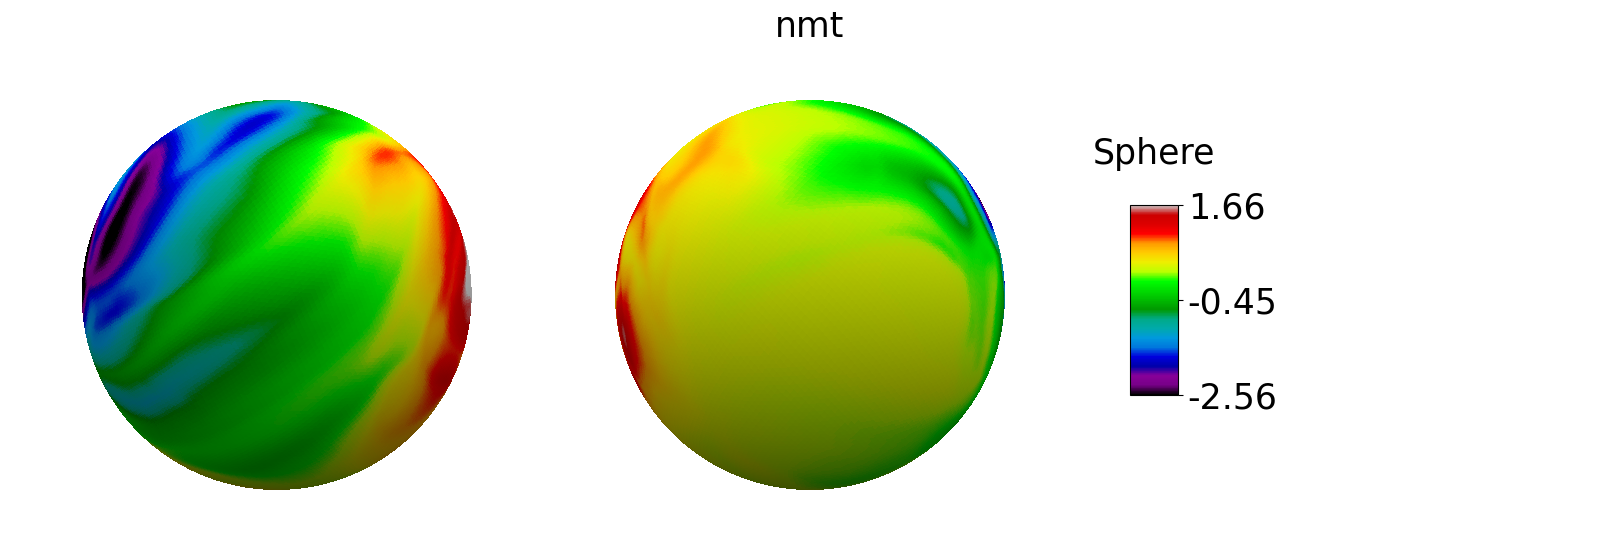

In [3]:
# Create Spheres 
from surfalign.utils import create_sphere
import os

clobber = False

sphere_dir = 'output/spheres'
os.makedirs(sphere_dir, exist_ok=True)

df['sphere'] = None

for i, row in df.iterrows(): 
    inflated_filename, sphere_filename = create_sphere(row['mid'], sphere_dir, title=row['atlas'], n=1, clobber=clobber)
    df.at[i, 'sphere'] = sphere_filename  


In [4]:
# Extract Metrics
import os
from surfalign.metrics import extract_metrics

clobber = False
metrics_dir = 'output/metrics'

os.makedirs(metrics_dir, exist_ok=True)

metrics_list = [ ['y','z'], ['curv','sulc'] ]

# add columns for each set of metrics
for i, _ in enumerate(metrics_list):
    df[f'metric_{i}'] = None


# extract metrics for mid surfaces
for i, row in df.iterrows(): 
    print(row['atlas'])
    metric_filename_list = extract_metrics(
        row['mid'], metrics_dir, metric_list_heir=metrics_list, params=dict(n_sulc=row['n_sulc'], n_curv=row['n_curv']), title=row['atlas'], clobber=clobber
          )
    
    for j, metric_filename in enumerate(metric_filename_list):
        df.at[i,f'metric_{j}'] = metric_filename




mebrains
Metrics ['y', 'z']
.gii
Mean: 0.43516225 Std: 0.22582752
Writing to
	 output/metrics/0//lh.MEBRAINS.mid_axis-1.func.gii
.gii
Mean: 0.52994084 Std: 0.22317037
Writing to
	 output/metrics/0//lh.MEBRAINS.mid_axis-2.func.gii
.gii
Metrics ['curv', 'sulc']
mris_inflate  -dist 0.1 -n 20 -sulc lh.MEBRAINS.mid.sulc data/mebrains/surfaces/lh.MEBRAINS.mid.surf.gii output/metrics/1//lh.lh.MEBRAINS.mid.inflated
Reading data/mebrains/surfaces/lh.MEBRAINS.mid.surf.gii


l_dist = 0.100
niterations = 20
sulc name = lh.MEBRAINS.mid.sulc
avg radius = 19.8 mm, total surface area = 10992 mm^2


step 120: RMS=0.023 (target=0.015)   
inflation complete.
mris_inflate utimesec    17.013893
mris_inflate stimesec    0.498289
mris_inflate ru_maxrss   479804
mris_inflate ru_ixrss    0
mris_inflate ru_idrss    0
mris_inflate ru_isrss    0
mris_inflate ru_minflt   379741
mris_inflate ru_majflt   0
mris_inflate ru_nswap    0
mris_inflate ru_inblock  0
mris_inflate ru_oublock  0
mris_inflate ru_msgsnd   0
mris_inflate ru_msgrcv   0
mris_inflate ru_nsignals 0
mris_inflate ru_nvcsw    2171
mris_inflate ru_nivcsw   172
mris_curvature -w -a 225  data/mebrains/surfaces/lh.MEBRAINS.mid.surf.gii


writing inflated surface to output/metrics/1//lh.lh.MEBRAINS.mid.inflated
writing sulcal depths to output/metrics/1//lh.lh.MEBRAINS.mid.sulc
inflation took 0.3 minutes
averaging curvature patterns 225 times.
total integrated curvature = -6.165*4pi (-77.475) --> 7 handles
ICI = 19.3, FI = 311.3, variation=4643.051
writing Gaussian curvature to data/mebrains/surfaces/lh.MEBRAINS.mid.surf.gii.K...done.
writing mean curvature to data/mebrains/surfaces/lh.MEBRAINS.mid.surf.gii.H...done.


.gii
yerkes19
Metrics ['y', 'z']
.gii
Mean: 0.44024667 Std: 0.20499854
Writing to
	 output/metrics/0//MacaqueYerkes19.L.mid.32k_fs_LR_axis-1.func.gii
.gii
Mean: 0.5301648 Std: 0.21372487
Writing to
	 output/metrics/0//MacaqueYerkes19.L.mid.32k_fs_LR_axis-2.func.gii
.gii
Metrics ['curv', 'sulc']
mris_inflate  -dist 0.1 -n 10 -sulc MacaqueYerkes19.L.mid.32k_fs_LR.sulc data/yerkes/surfaces/MacaqueYerkes19.L.mid.32k_fs_LR.surf.gii output/metrics/1//lh.MacaqueYerkes19.L.mid.32k_fs_LR.inflated
Reading data/yerkes/surfaces/MacaqueYerkes19.L.mid.32k_fs_LR.surf.gii


l_dist = 0.100
niterations = 10
sulc name = MacaqueYerkes19.L.mid.32k_fs_LR.sulc
** DA[1] has coordsys with intent NIFTI_INTENT_TRIANGLE (should be NIFTI_INTENT_POINTSET)
avg radius = 18.5 mm, total surface area = 11428 mm^2


step 060: RMS=0.023 (target=0.015)   
inflation complete.
mris_inflate utimesec    2.277226
mris_inflate stimesec    0.215021
mris_inflate ru_maxrss   604336
mris_inflate ru_ixrss    0
mris_inflate ru_idrss    0
mris_inflate ru_isrss    0
mris_inflate ru_minflt   140659
mris_inflate ru_majflt   0
mris_inflate ru_nswap    0
mris_inflate ru_inblock  0
mris_inflate ru_oublock  0
mris_inflate ru_msgsnd   0
mris_inflate ru_msgrcv   0
mris_inflate ru_nsignals 0
mris_inflate ru_nvcsw    832
mris_inflate ru_nivcsw   42
mris_curvature -w -a 10  data/yerkes/surfaces/MacaqueYerkes19.L.mid.32k_fs_LR.surf.gii


writing inflated surface to output/metrics/1//lh.MacaqueYerkes19.L.mid.32k_fs_LR.inflated
writing sulcal depths to output/metrics/1//rh.MacaqueYerkes19.L.mid.32k_fs_LR.sulc
inflation took 0.0 minutes
averaging curvature patterns 10 times.
** DA[1] has coordsys with intent NIFTI_INTENT_TRIANGLE (should be NIFTI_INTENT_POINTSET)
total integrated curvature = 4.992*4pi (62.732) --> -4 handles
ICI = 21.5, FI = 257.4, variation=3858.872
writing Gaussian curvature to data/yerkes/surfaces/MacaqueYerkes19.L.mid.32k_fs_LR.surf.gii.K...done.
writing mean curvature to data/yerkes/surfaces/MacaqueYerkes19.L.mid.32k_fs_LR.surf.gii.H...done.


.gii
d99
Metrics ['y', 'z']
.gii
Mean: 0.44226548 Std: 0.22182345
Writing to
	 output/metrics/0//D99_L_AVG_T1_v2.L.MID.167625_axis-1.func.gii
.gii
Mean: 0.5430131 Std: 0.20162775
Writing to
	 output/metrics/0//D99_L_AVG_T1_v2.L.MID.167625_axis-2.func.gii
.gii
Metrics ['curv', 'sulc']
mris_inflate  -dist 0.1 -n 10 -sulc D99_L_AVG_T1_v2.L.MID.167625.sulc data/d99/surfaces/D99_L_AVG_T1_v2.L.MID.167625.surf.gii output/metrics/1//lh.D99_L_AVG_T1_v2.L.MID.167625.inflated
Reading data/d99/surfaces/D99_L_AVG_T1_v2.L.MID.167625.surf.gii


l_dist = 0.100
niterations = 10
sulc name = D99_L_AVG_T1_v2.L.MID.167625.sulc
avg radius = 19.9 mm, total surface area = 14511 mm^2


step 060: RMS=0.034 (target=0.015)   
inflation complete.
mris_inflate utimesec    14.740086
mris_inflate stimesec    0.475163
mris_inflate ru_maxrss   1026624
mris_inflate ru_ixrss    0
mris_inflate ru_idrss    0
mris_inflate ru_isrss    0
mris_inflate ru_minflt   365381
mris_inflate ru_majflt   0
mris_inflate ru_nswap    0
mris_inflate ru_inblock  0
mris_inflate ru_oublock  0
mris_inflate ru_msgsnd   0
mris_inflate ru_msgrcv   0
mris_inflate ru_nsignals 0
mris_inflate ru_nvcsw    3473
mris_inflate ru_nivcsw   305


writing inflated surface to output/metrics/1//lh.D99_L_AVG_T1_v2.L.MID.167625.inflated
writing sulcal depths to output/metrics/1//rh.D99_L_AVG_T1_v2.L.MID.167625.sulc
inflation took 0.3 minutes


mris_curvature -w -a 10  data/d99/surfaces/D99_L_AVG_T1_v2.L.MID.167625.surf.gii


averaging curvature patterns 10 times.
total integrated curvature = 7.479*4pi (93.990) --> -6 handles
ICI = 74.5, FI = 616.3, variation=10189.736
writing Gaussian curvature to data/d99/surfaces/D99_L_AVG_T1_v2.L.MID.167625.surf.gii.K...done.
writing mean curvature to data/d99/surfaces/D99_L_AVG_T1_v2.L.MID.167625.surf.gii.H...done.


.gii
f99
Metrics ['y', 'z']
.gii
Mean: 0.45530286 Std: 0.21573763
Writing to
	 output/metrics/0//lh.rmac.midthickness.32k_axis-1.func.gii
.gii
Mean: 0.5408033 Std: 0.2260371
Writing to
	 output/metrics/0//lh.rmac.midthickness.32k_axis-2.func.gii
.gii
Metrics ['curv', 'sulc']
mris_inflate  -dist 0.1 -n 10 -sulc lh.rmac.midthickness.32k.sulc data/f99/lh.rmac.midthickness.32k.surf.gii output/metrics/1//lh.lh.rmac.midthickness.32k.inflated
Reading data/f99/lh.rmac.midthickness.32k.surf.gii


l_dist = 0.100
niterations = 10
sulc name = lh.rmac.midthickness.32k.sulc
avg radius = 20.3 mm, total surface area = 12714 mm^2


step 060: RMS=0.024 (target=0.015)   
inflation complete.
mris_inflate utimesec    2.600539
mris_inflate stimesec    0.228310
mris_inflate ru_maxrss   1350256
mris_inflate ru_ixrss    0
mris_inflate ru_idrss    0
mris_inflate ru_isrss    0
mris_inflate ru_minflt   140718
mris_inflate ru_majflt   0
mris_inflate ru_nswap    0
mris_inflate ru_inblock  0
mris_inflate ru_oublock  0
mris_inflate ru_msgsnd   0
mris_inflate ru_msgrcv   0
mris_inflate ru_nsignals 0
mris_inflate ru_nvcsw    828
mris_inflate ru_nivcsw   42
mris_curvature -w -a 40  data/f99/lh.rmac.midthickness.32k.surf.gii


writing inflated surface to output/metrics/1//lh.lh.rmac.midthickness.32k.inflated
writing sulcal depths to output/metrics/1//lh.lh.rmac.midthickness.32k.sulc
inflation took 0.0 minutes
averaging curvature patterns 40 times.
total integrated curvature = 16.506*4pi (207.424) --> -16 handles
ICI = 38.0, FI = 375.8, variation=5717.864
writing Gaussian curvature to data/f99/lh.rmac.midthickness.32k.surf.gii.K...done.
writing mean curvature to data/f99/lh.rmac.midthickness.32k.surf.gii.H...done.


.gii
nmt
Metrics ['y', 'z']
.gii
Mean: 0.44585827 Std: 0.23625891
Writing to
	 output/metrics/0//NMT_v2.0_sym_lh.mid_surface.rsl.gii_axis-1.func.gii
.gii
Mean: 0.54582095 Std: 0.22699678
Writing to
	 output/metrics/0//NMT_v2.0_sym_lh.mid_surface.rsl.gii_axis-2.func.gii
.gii
Metrics ['curv', 'sulc']
mris_inflate  -dist 0.1 -n 10 -sulc NMT_v2.0_sym_lh.mid_surface.rsl.gii.sulc data/nmt2.0/surfaces/NMT_v2.0_sym_lh.mid_surface.rsl.gii output/metrics/1//lh.NMT_v2.0_sym_lh.mid_surface.rsl.gii.inflated
Reading data/nmt2.0/surfaces/NMT_v2.0_sym_lh.mid_surface.rsl.gii


l_dist = 0.100
niterations = 10
sulc name = NMT_v2.0_sym_lh.mid_surface.rsl.gii.sulc
avg radius = 19.9 mm, total surface area = 10933 mm^2


step 055: RMS=0.021 (target=0.015)   

writing inflated surface to output/metrics/1//lh.NMT_v2.0_sym_lh.mid_surface.rsl.gii.inflated
writing sulcal depths to output/metrics/1//rh.NMT_v2.0_sym_lh.mid_surface.rsl.gii.sulc
inflation took 0.1 minutes
averaging curvature patterns 10 times.


step 060: RMS=0.019 (target=0.015)   
inflation complete.
mris_inflate utimesec    3.676760
mris_inflate stimesec    0.247849
mris_inflate ru_maxrss   1455772
mris_inflate ru_ixrss    0
mris_inflate ru_idrss    0
mris_inflate ru_isrss    0
mris_inflate ru_minflt   178504
mris_inflate ru_majflt   0
mris_inflate ru_nswap    0
mris_inflate ru_inblock  0
mris_inflate ru_oublock  0
mris_inflate ru_msgsnd   0
mris_inflate ru_msgrcv   0
mris_inflate ru_nsignals 0
mris_inflate ru_nvcsw    998
mris_inflate ru_nivcsw   104
mris_curvature -w -a 10  data/nmt2.0/surfaces/NMT_v2.0_sym_lh.mid_surface.rsl.gii


total integrated curvature = 14.931*4pi (187.632) --> -14 handles
ICI = 34.5, FI = 339.4, variation=5149.890
writing Gaussian curvature to data/nmt2.0/surfaces/NMT_v2.0_sym_lh.mid_surface.rsl.gii.K...done.
writing mean curvature to data/nmt2.0/surfaces/NMT_v2.0_sym_lh.mid_surface.rsl.gii.H...done.


.gii


In [5]:
df

,atlas,hemishphere,mid,n_curv,n_sulc,n_vertices,sphere,metric_0,metric_1
0,mebrains,left,data/mebrains/surfaces/lh.MEBRAINS.mid.surf.gii,225,20,100988,output/spheres/lh.MEBRAINS.mid.sphere.gii,output/metrics/0//lh.lh.MEBRAINS.mid_metrics_y...,output/metrics/1//lh.lh.MEBRAINS.mid_metrics_c...
1,yerkes19,left,data/yerkes/surfaces/MacaqueYerkes19.L.mid.32k...,10,10,32492,output/spheres/MacaqueYerkes19.L.mid.32k_fs_LR...,output/metrics/0//lh.MacaqueYerkes19.L.mid.32k...,output/metrics/1//lh.MacaqueYerkes19.L.mid.32k...
2,d99,left,data/d99/surfaces/D99_L_AVG_T1_v2.L.MID.167625...,10,10,167625,output/spheres/D99_L_AVG_T1_v2.L.MID.167625.sp...,output/metrics/0//lh.D99_L_AVG_T1_v2.L.MID.167...,output/metrics/1//lh.D99_L_AVG_T1_v2.L.MID.167...
3,f99,left,data/f99/lh.rmac.midthickness.32k.surf.gii,40,10,32492,output/spheres/lh.rmac.midthickness.32k.sphere...,output/metrics/0//lh.lh.rmac.midthickness.32k_...,output/metrics/1//lh.lh.rmac.midthickness.32k_...
4,nmt,left,data/nmt2.0/surfaces/NMT_v2.0_sym_lh.mid_surfa...,10,10,40962,output/spheres/NMT_v2.0_sym_lh.mid_surface.rsl...,output/metrics/0//lh.NMT_v2.0_sym_lh.mid_surfa...,output/metrics/1//lh.NMT_v2.0_sym_lh.mid_surfa...


In [6]:
# Align Spheres using Metrics
import os
from surfalign.surfalign import surfalign

clobber = False

n_vertices = 32492


os.makedirs(output_dir, exist_ok=True)
aligned_dir='output/aligned/'


for i, rowi in df.iterrows():
    for j, rowj in df.iterrows():
        if i < j:
            atlasi = rowi['atlas']
            atlasj = rowj['atlas']
            
            metrics_i = [rowi['metric_0'], rowi['metric_1']]
            metrics_j = [rowj['metric_0'], rowj['metric_1']]
            print(rowi['atlas'], rowj['atlas']) 

            output_dir = f'{aligned_dir}/{atlasi}_to_{atlasj}'

            surfalign(
                rowi['sphere'], 
                rowi['mid'],
                rowj['sphere'],
                rowj['mid'], 
                output_dir,
                fixed_metrics_list = metrics_i, 
                moving_metrics_list = metrics_j, 
                title=f'{rowi["atlas"]}_{rowj["atlas"]}',
                n_vertices = n_vertices, 
                clobber=clobber
                )


mebrains yerkes19
fixed_sphere output/spheres/lh.MEBRAINS.mid.sphere.gii
fixed_mid_cortex data/mebrains/surfaces/lh.MEBRAINS.mid.surf.gii
moving_sphere output/spheres/MacaqueYerkes19.L.mid.32k_fs_LR.sphere.gii
moving_mid_cortex data/yerkes/surfaces/MacaqueYerkes19.L.mid.32k_fs_LR.surf.gii
Gifti
.gii
.gii
wb_command  -surface-modify-sphere  output/spheres/lh.MEBRAINS.mid.sphere.gii 1 output/aligned//mebrains_to_yerkes19/n-32492_lh.MEBRAINS.mid.sphere.gii -recenter


wb_command -surface-resample data/mebrains/surfaces/lh.MEBRAINS.mid.surf.gii output/spheres/lh.MEBRAINS.mid.sphere.gii output/aligned//mebrains_to_yerkes19/n-32492_lh.MEBRAINS.mid.sphere.gii BARYCENTRIC output/aligned//mebrains_to_yerkes19/n-32492_lh.MEBRAINS.mid.surf.gii
.gii


fixed_mid_cortex_rsl output/aligned//mebrains_to_yerkes19/n-32492_lh.MEBRAINS.mid.surf.gii

moving_sphere output/aligned//mebrains_to_yerkes19/MacaqueYerkes19_L_mid_32k_fs_LR.surf.gii
moving_sphere_rsl output/aligned//mebrains_to_yerkes19/MacaqueYerkes19_L_mid_32k_fs_LR.surf.gii
metrics_list ['output/metrics/0//lh.MacaqueYerkes19.L.mid.32k_fs_LR_metrics_y_z.func.gii', 'output/metrics/1//lh.MacaqueYerkes19.L.mid.32k_fs_LR_metrics_curv_sulc.func.gii']

fixed_sphere output/spheres/lh.MEBRAINS.mid.sphere.gii
fixed sphere_rsl output/aligned//mebrains_to_yerkes19/n-32492_lh.MEBRAINS.mid.sphere.gii
metrics_list ['output/metrics/0//lh.lh.MEBRAINS.mid_metrics_y_z.func.gii', 'output/metrics/1//lh.lh.MEBRAINS.mid_metrics_curv_sulc.func.gii']
fixed_mid_cortex_rsl output/aligned//mebrains_to_yerkes19/n-32492_lh.MEBRAINS.mid.surf.gii
['output/metrics/0//lh.lh.MEBRAINS.mid_metrics_y_z.func.gii', 'output/metrics/1//lh.lh.MEBRAINS.mid_metrics_curv_sulc.func.gii']
['output/metrics/0//lh.MacaqueYerkes19.

** DA[1] has coordsys with intent NIFTI_INTENT_TRIANGLE (should be NIFTI_INTENT_POINTSET)


cost.size() 4 AFFINE,DISCRETE,DISCRETE,DISCRETE
 iters 50,3,3,3
lambda 0,0.1,0.2,0.3
 sigmain 2,2,3,2
 sigmaref 2,2,1.5,1
 datagrid 4,4,5,6
 cp gridres 0,2,3,4
 sp grid 0,4,5,6
 alpha_knn 5,5,5,5
 in parse options  _simval 1,2,2,2 interations 50,3,3,3 input sigma 2,2,3,2 ref sigma 2,2,1.5,1 lambda 0,0.1,0.2,0.3  _genesis 4,4,5,6 _gridres 0,2,3,4 _sampres 0,4,5,6 opt AFFINE,DISCRETE,DISCRETE,DISCRETE _scale 0 mesh interpolator BARY discrete implementation FastPD regoption 1 potts 0
 Initialising level 1
Affine registration started
******:   1 per 0.5 loop0  (loop*_iters)+ _iter 1
grad_zero:   -80.8471
mingrad_zero:   -80.8471min_iter 0
stepsize:   0.01
******:   2 per 0.5 loop0  (loop*_iters)+ _iter 2
grad_zero:   -80.9236
mingrad_zero:   -80.8471min_iter 0
stepsize:   0.005
******:   3 per 0.5 loop0  (loop*_iters)+ _iter 3
grad_zero:   -80.4654
mingrad_zero:   -80.4654min_iter 2
stepsize:   0.005
******:   4 per 0.5 loop0  (loop*_iters)+ _iter 4
grad_zero:   -80.6934
mingrad_zero:   -8

** DA[1] has coordsys with intent NIFTI_INTENT_TRIANGLE (should be NIFTI_INTENT_POINTSET)


cost.size() 4 AFFINE,DISCRETE,DISCRETE,DISCRETE
 iters 50,3,3,3
lambda 0,0.1,0.2,0.3
 sigmain 2,2,3,2
 sigmaref 2,2,1.5,1
 datagrid 4,4,5,6
 cp gridres 0,2,3,4
 sp grid 0,4,5,6
 alpha_knn 5,5,5,5
 in parse options  _simval 1,2,2,2 interations 50,3,3,3 input sigma 2,2,3,2 ref sigma 2,2,1.5,1 lambda 0,0.1,0.2,0.3  _genesis 4,4,5,6 _gridres 0,2,3,4 _sampres 0,4,5,6 opt AFFINE,DISCRETE,DISCRETE,DISCRETE _scale 0 mesh interpolator BARY discrete implementation FastPD regoption 1 potts 0
 Initialising level 1
Affine registration started
******:   1 per 0.5 loop0  (loop*_iters)+ _iter 1
grad_zero:   -2821.74
mingrad_zero:   -2821.74min_iter 0
stepsize:   0.01
******:   2 per 0.5 loop0  (loop*_iters)+ _iter 2
grad_zero:   -2866.7
mingrad_zero:   -2821.74min_iter 0
stepsize:   0.005
******:   3 per 0.5 loop0  (loop*_iters)+ _iter 3
grad_zero:   -2843.73
mingrad_zero:   -2821.74min_iter 0
stepsize:   0.0025
******:   4 per 0.5 loop0  (loop*_iters)+ _iter 4
grad_zero:   -2831.56
mingrad_zero:   -2

wb_command -surface-resample data/mebrains/surfaces/lh.MEBRAINS.mid.surf.gii output/spheres/lh.MEBRAINS.mid.sphere.gii output/aligned//mebrains_to_d99/n-32492_lh.MEBRAINS.mid.sphere.gii BARYCENTRIC output/aligned//mebrains_to_d99/n-32492_lh.MEBRAINS.mid.surf.gii
.gii
.gii
wb_command  -surface-modify-sphere  output/aligned//mebrains_to_d99/D99_L_AVG_T1_v2_L_MID_167625.surf.gii 1 output/aligned//mebrains_to_d99/n-32492_D99_L_AVG_T1_v2_L_MID_167625.surf.gii -recenter
wb_command -surface-resample data/d99/surfaces/D99_L_AVG_T1_v2.L.MID.167625.surf.gii output/aligned//mebrains_to_d99/D99_L_AVG_T1_v2_L_MID_167625.surf.gii output/aligned//mebrains_to_d99/n-32492_D99_L_AVG_T1_v2_L_MID_167625.surf.gii BARYCENTRIC output/aligned//mebrains_to_d99/n-32492_D99_L_AVG_T1_v2.L.MID.167625.surf.gii


fixed_mid_cortex_rsl output/aligned//mebrains_to_d99/n-32492_lh.MEBRAINS.mid.surf.gii

moving_sphere output/aligned//mebrains_to_d99/D99_L_AVG_T1_v2_L_MID_167625.surf.gii
moving_sphere_rsl output/aligned//mebrains_to_d99/n-32492_D99_L_AVG_T1_v2_L_MID_167625.surf.gii
metrics_list ['output/metrics/0//lh.D99_L_AVG_T1_v2.L.MID.167625_metrics_y_z.func.gii', 'output/metrics/1//lh.D99_L_AVG_T1_v2.L.MID.167625_metrics_curv_sulc.func.gii']

fixed_sphere output/spheres/lh.MEBRAINS.mid.sphere.gii
fixed sphere_rsl output/aligned//mebrains_to_d99/n-32492_lh.MEBRAINS.mid.sphere.gii
metrics_list ['output/metrics/0//lh.lh.MEBRAINS.mid_metrics_y_z.func.gii', 'output/metrics/1//lh.lh.MEBRAINS.mid_metrics_curv_sulc.func.gii']
fixed_mid_cortex_rsl output/aligned//mebrains_to_d99/n-32492_lh.MEBRAINS.mid.surf.gii
['output/metrics/0//lh.lh.MEBRAINS.mid_metrics_y_z.func.gii', 'output/metrics/1//lh.lh.MEBRAINS.mid_metrics_curv_sulc.func.gii']
['output/metrics/0//lh.D99_L_AVG_T1_v2.L.MID.167625_metrics_y_z.func

wb_command -surface-resample data/mebrains/surfaces/lh.MEBRAINS.mid.surf.gii output/spheres/lh.MEBRAINS.mid.sphere.gii output/aligned//mebrains_to_f99/n-32492_lh.MEBRAINS.mid.sphere.gii BARYCENTRIC output/aligned//mebrains_to_f99/n-32492_lh.MEBRAINS.mid.surf.gii
.gii


fixed_mid_cortex_rsl output/aligned//mebrains_to_f99/n-32492_lh.MEBRAINS.mid.surf.gii

moving_sphere output/aligned//mebrains_to_f99/lh_rmac_midthickness_32k.surf.gii
moving_sphere_rsl output/aligned//mebrains_to_f99/lh_rmac_midthickness_32k.surf.gii
metrics_list ['output/metrics/0//lh.lh.rmac.midthickness.32k_metrics_y_z.func.gii', 'output/metrics/1//lh.lh.rmac.midthickness.32k_metrics_curv_sulc.func.gii']

fixed_sphere output/spheres/lh.MEBRAINS.mid.sphere.gii
fixed sphere_rsl output/aligned//mebrains_to_f99/n-32492_lh.MEBRAINS.mid.sphere.gii
metrics_list ['output/metrics/0//lh.lh.MEBRAINS.mid_metrics_y_z.func.gii', 'output/metrics/1//lh.lh.MEBRAINS.mid_metrics_curv_sulc.func.gii']
fixed_mid_cortex_rsl output/aligned//mebrains_to_f99/n-32492_lh.MEBRAINS.mid.surf.gii
['output/metrics/0//lh.lh.MEBRAINS.mid_metrics_y_z.func.gii', 'output/metrics/1//lh.lh.MEBRAINS.mid_metrics_curv_sulc.func.gii']
['output/metrics/0//lh.lh.rmac.midthickness.32k_metrics_y_z.func.gii', 'output/metrics/1//lh

** DA[1] has coordsys with intent NIFTI_INTENT_TRIANGLE (should be NIFTI_INTENT_POINTSET)


cost.size() 4 AFFINE,DISCRETE,DISCRETE,DISCRETE
 iters 50,3,3,3
lambda 0,0.1,0.2,0.3
 sigmain 2,2,3,2
 sigmaref 2,2,1.5,1
 datagrid 4,4,5,6
 cp gridres 0,2,3,4
 sp grid 0,4,5,6
 alpha_knn 5,5,5,5
 in parse options  _simval 1,2,2,2 interations 50,3,3,3 input sigma 2,2,3,2 ref sigma 2,2,1.5,1 lambda 0,0.1,0.2,0.3  _genesis 4,4,5,6 _gridres 0,2,3,4 _sampres 0,4,5,6 opt AFFINE,DISCRETE,DISCRETE,DISCRETE _scale 0 mesh interpolator BARY discrete implementation FastPD regoption 1 potts 0
 Initialising level 1
Affine registration started
******:   1 per 0.5 loop0  (loop*_iters)+ _iter 1
grad_zero:   -84.0088
mingrad_zero:   -84.0088min_iter 0
stepsize:   0.01
******:   2 per 0.5 loop0  (loop*_iters)+ _iter 2
grad_zero:   -83.9005
mingrad_zero:   -83.9005min_iter 1
stepsize:   0.01
******:   3 per 0.5 loop0  (loop*_iters)+ _iter 3
grad_zero:   -84.3274
mingrad_zero:   -83.9005min_iter 1
stepsize:   0.005
******:   4 per 0.5 loop0  (loop*_iters)+ _iter 4
grad_zero:   -83.9056
mingrad_zero:   -83

** DA[1] has coordsys with intent NIFTI_INTENT_TRIANGLE (should be NIFTI_INTENT_POINTSET)


cost.size() 4 AFFINE,DISCRETE,DISCRETE,DISCRETE
 iters 50,3,3,3
lambda 0,0.1,0.2,0.3
 sigmain 2,2,3,2
 sigmaref 2,2,1.5,1
 datagrid 4,4,5,6
 cp gridres 0,2,3,4
 sp grid 0,4,5,6
 alpha_knn 5,5,5,5
 in parse options  _simval 1,2,2,2 interations 50,3,3,3 input sigma 2,2,3,2 ref sigma 2,2,1.5,1 lambda 0,0.1,0.2,0.3  _genesis 4,4,5,6 _gridres 0,2,3,4 _sampres 0,4,5,6 opt AFFINE,DISCRETE,DISCRETE,DISCRETE _scale 0 mesh interpolator BARY discrete implementation FastPD regoption 1 potts 0
 Initialising level 1
Affine registration started
******:   1 per 0.5 loop0  (loop*_iters)+ _iter 1
grad_zero:   -2636.56
mingrad_zero:   -2636.56min_iter 0
stepsize:   0.01
******:   2 per 0.5 loop0  (loop*_iters)+ _iter 2
grad_zero:   -2685.41
mingrad_zero:   -2636.56min_iter 0
stepsize:   0.005
******:   3 per 0.5 loop0  (loop*_iters)+ _iter 3
grad_zero:   -2661.15
mingrad_zero:   -2636.56min_iter 0
stepsize:   0.0025
******:   4 per 0.5 loop0  (loop*_iters)+ _iter 4
grad_zero:   -2644.85
mingrad_zero:   -

wb_command -surface-resample data/mebrains/surfaces/lh.MEBRAINS.mid.surf.gii output/spheres/lh.MEBRAINS.mid.sphere.gii output/aligned//mebrains_to_nmt/n-32492_lh.MEBRAINS.mid.sphere.gii BARYCENTRIC output/aligned//mebrains_to_nmt/n-32492_lh.MEBRAINS.mid.surf.gii
.gii
.gii
wb_command  -surface-modify-sphere  output/aligned//mebrains_to_nmt/NMT_v2_0_sym_lh_mid_surface_rsl_gii.surf.gii 1 output/aligned//mebrains_to_nmt/n-32492_NMT_v2_0_sym_lh_mid_surface_rsl_gii.surf.gii -recenter
wb_command -surface-resample data/nmt2.0/surfaces/NMT_v2.0_sym_lh.mid_surface.rsl.gii output/aligned//mebrains_to_nmt/NMT_v2_0_sym_lh_mid_surface_rsl_gii.surf.gii output/aligned//mebrains_to_nmt/n-32492_NMT_v2_0_sym_lh_mid_surface_rsl_gii.surf.gii BARYCENTRIC output/aligned//mebrains_to_nmt/n-32492_NMT_v2.0_sym_lh.mid_surface.rsl.gii


fixed_mid_cortex_rsl output/aligned//mebrains_to_nmt/n-32492_lh.MEBRAINS.mid.surf.gii

moving_sphere output/aligned//mebrains_to_nmt/NMT_v2_0_sym_lh_mid_surface_rsl_gii.surf.gii
moving_sphere_rsl output/aligned//mebrains_to_nmt/n-32492_NMT_v2_0_sym_lh_mid_surface_rsl_gii.surf.gii
metrics_list ['output/metrics/0//lh.NMT_v2.0_sym_lh.mid_surface.rsl.gii_metrics_y_z.func.gii', 'output/metrics/1//lh.NMT_v2.0_sym_lh.mid_surface.rsl.gii_metrics_curv_sulc.func.gii']

fixed_sphere output/spheres/lh.MEBRAINS.mid.sphere.gii
fixed sphere_rsl output/aligned//mebrains_to_nmt/n-32492_lh.MEBRAINS.mid.sphere.gii
metrics_list ['output/metrics/0//lh.lh.MEBRAINS.mid_metrics_y_z.func.gii', 'output/metrics/1//lh.lh.MEBRAINS.mid_metrics_curv_sulc.func.gii']
fixed_mid_cortex_rsl output/aligned//mebrains_to_nmt/n-32492_lh.MEBRAINS.mid.surf.gii
['output/metrics/0//lh.lh.MEBRAINS.mid_metrics_y_z.func.gii', 'output/metrics/1//lh.lh.MEBRAINS.mid_metrics_curv_sulc.func.gii']
['output/metrics/0//lh.NMT_v2.0_sym_lh.m

fixed_mid_cortex_rsl data/yerkes/surfaces/MacaqueYerkes19.L.mid.32k_fs_LR.surf.gii

moving_sphere output/aligned//yerkes19_to_d99/D99_L_AVG_T1_v2_L_MID_167625.surf.gii
moving_sphere_rsl output/aligned//yerkes19_to_d99/n-32492_D99_L_AVG_T1_v2_L_MID_167625.surf.gii
metrics_list ['output/metrics/0//lh.D99_L_AVG_T1_v2.L.MID.167625_metrics_y_z.func.gii', 'output/metrics/1//lh.D99_L_AVG_T1_v2.L.MID.167625_metrics_curv_sulc.func.gii']

fixed_sphere output/spheres/MacaqueYerkes19.L.mid.32k_fs_LR.sphere.gii
fixed sphere_rsl output/spheres/MacaqueYerkes19.L.mid.32k_fs_LR.sphere.gii
metrics_list ['output/metrics/0//lh.MacaqueYerkes19.L.mid.32k_fs_LR_metrics_y_z.func.gii', 'output/metrics/1//lh.MacaqueYerkes19.L.mid.32k_fs_LR_metrics_curv_sulc.func.gii']
fixed_mid_cortex_rsl data/yerkes/surfaces/MacaqueYerkes19.L.mid.32k_fs_LR.surf.gii
['output/metrics/0//lh.MacaqueYerkes19.L.mid.32k_fs_LR_metrics_y_z.func.gii', 'output/metrics/1//lh.MacaqueYerkes19.L.mid.32k_fs_LR_metrics_curv_sulc.func.gii']
['o



** DA[1] has coordsys with intent NIFTI_INTENT_TRIANGLE (should be NIFTI_INTENT_POINTSET)


fixed_mid_cortex_rsl data/yerkes/surfaces/MacaqueYerkes19.L.mid.32k_fs_LR.surf.gii

moving_sphere output/aligned//yerkes19_to_f99/lh_rmac_midthickness_32k.surf.gii
moving_sphere_rsl output/aligned//yerkes19_to_f99/lh_rmac_midthickness_32k.surf.gii
metrics_list ['output/metrics/0//lh.lh.rmac.midthickness.32k_metrics_y_z.func.gii', 'output/metrics/1//lh.lh.rmac.midthickness.32k_metrics_curv_sulc.func.gii']

fixed_sphere output/spheres/MacaqueYerkes19.L.mid.32k_fs_LR.sphere.gii
fixed sphere_rsl output/spheres/MacaqueYerkes19.L.mid.32k_fs_LR.sphere.gii
metrics_list ['output/metrics/0//lh.MacaqueYerkes19.L.mid.32k_fs_LR_metrics_y_z.func.gii', 'output/metrics/1//lh.MacaqueYerkes19.L.mid.32k_fs_LR_metrics_curv_sulc.func.gii']
fixed_mid_cortex_rsl data/yerkes/surfaces/MacaqueYerkes19.L.mid.32k_fs_LR.surf.gii
['output/metrics/0//lh.MacaqueYerkes19.L.mid.32k_fs_LR_metrics_y_z.func.gii', 'output/metrics/1//lh.MacaqueYerkes19.L.mid.32k_fs_LR_metrics_curv_sulc.func.gii']
['output/metrics/0//lh.lh.r

** DA[1] has coordsys with intent NIFTI_INTENT_TRIANGLE (should be NIFTI_INTENT_POINTSET)


cost.size() 4 AFFINE,DISCRETE,DISCRETE,DISCRETE
 iters 50,3,3,3
lambda 0,0.1,0.2,0.3
 sigmain 2,2,3,2
 sigmaref 2,2,1.5,1
 datagrid 4,4,5,6
 cp gridres 0,2,3,4
 sp grid 0,4,5,6
 alpha_knn 5,5,5,5
 in parse options  _simval 1,2,2,2 interations 50,3,3,3 input sigma 2,2,3,2 ref sigma 2,2,1.5,1 lambda 0,0.1,0.2,0.3  _genesis 4,4,5,6 _gridres 0,2,3,4 _sampres 0,4,5,6 opt AFFINE,DISCRETE,DISCRETE,DISCRETE _scale 0 mesh interpolator BARY discrete implementation FastPD regoption 1 potts 0
 Initialising level 1
Affine registration started
******:   1 per 0.5 loop0  (loop*_iters)+ _iter 1
grad_zero:   -1913.46
mingrad_zero:   -1913.46min_iter 0
stepsize:   0.01
******:   2 per 0.5 loop0  (loop*_iters)+ _iter 2
grad_zero:   -1920.8
mingrad_zero:   -1913.46min_iter 0
stepsize:   0.005
******:   3 per 0.5 loop0  (loop*_iters)+ _iter 3
grad_zero:   -1915.42
mingrad_zero:   -1913.46min_iter 0
stepsize:   0.0025
******:   4 per 0.5 loop0  (loop*_iters)+ _iter 4
grad_zero:   -1913.24
mingrad_zero:   -1

fixed_mid_cortex_rsl data/yerkes/surfaces/MacaqueYerkes19.L.mid.32k_fs_LR.surf.gii

moving_sphere output/aligned//yerkes19_to_nmt/NMT_v2_0_sym_lh_mid_surface_rsl_gii.surf.gii
moving_sphere_rsl output/aligned//yerkes19_to_nmt/n-32492_NMT_v2_0_sym_lh_mid_surface_rsl_gii.surf.gii
metrics_list ['output/metrics/0//lh.NMT_v2.0_sym_lh.mid_surface.rsl.gii_metrics_y_z.func.gii', 'output/metrics/1//lh.NMT_v2.0_sym_lh.mid_surface.rsl.gii_metrics_curv_sulc.func.gii']

fixed_sphere output/spheres/MacaqueYerkes19.L.mid.32k_fs_LR.sphere.gii
fixed sphere_rsl output/spheres/MacaqueYerkes19.L.mid.32k_fs_LR.sphere.gii
metrics_list ['output/metrics/0//lh.MacaqueYerkes19.L.mid.32k_fs_LR_metrics_y_z.func.gii', 'output/metrics/1//lh.MacaqueYerkes19.L.mid.32k_fs_LR_metrics_curv_sulc.func.gii']
fixed_mid_cortex_rsl data/yerkes/surfaces/MacaqueYerkes19.L.mid.32k_fs_LR.surf.gii
['output/metrics/0//lh.MacaqueYerkes19.L.mid.32k_fs_LR_metrics_y_z.func.gii', 'output/metrics/1//lh.MacaqueYerkes19.L.mid.32k_fs_LR_metr

wb_command -surface-resample data/d99/surfaces/D99_L_AVG_T1_v2.L.MID.167625.surf.gii output/spheres/D99_L_AVG_T1_v2.L.MID.167625.sphere.gii output/aligned//d99_to_f99/n-32492_D99_L_AVG_T1_v2.L.MID.167625.sphere.gii BARYCENTRIC output/aligned//d99_to_f99/n-32492_D99_L_AVG_T1_v2.L.MID.167625.surf.gii
.gii


fixed_mid_cortex_rsl output/aligned//d99_to_f99/n-32492_D99_L_AVG_T1_v2.L.MID.167625.surf.gii

moving_sphere output/aligned//d99_to_f99/lh_rmac_midthickness_32k.surf.gii
moving_sphere_rsl output/aligned//d99_to_f99/lh_rmac_midthickness_32k.surf.gii
metrics_list ['output/metrics/0//lh.lh.rmac.midthickness.32k_metrics_y_z.func.gii', 'output/metrics/1//lh.lh.rmac.midthickness.32k_metrics_curv_sulc.func.gii']

fixed_sphere output/spheres/D99_L_AVG_T1_v2.L.MID.167625.sphere.gii
fixed sphere_rsl output/aligned//d99_to_f99/n-32492_D99_L_AVG_T1_v2.L.MID.167625.sphere.gii
metrics_list ['output/metrics/0//lh.D99_L_AVG_T1_v2.L.MID.167625_metrics_y_z.func.gii', 'output/metrics/1//lh.D99_L_AVG_T1_v2.L.MID.167625_metrics_curv_sulc.func.gii']
fixed_mid_cortex_rsl output/aligned//d99_to_f99/n-32492_D99_L_AVG_T1_v2.L.MID.167625.surf.gii
['output/metrics/0//lh.D99_L_AVG_T1_v2.L.MID.167625_metrics_y_z.func.gii', 'output/metrics/1//lh.D99_L_AVG_T1_v2.L.MID.167625_metrics_curv_sulc.func.gii']
['output/metr

** DA[1] has coordsys with intent NIFTI_INTENT_TRIANGLE (should be NIFTI_INTENT_POINTSET)


cost.size() 4 AFFINE,DISCRETE,DISCRETE,DISCRETE
 iters 50,3,3,3
lambda 0,0.1,0.2,0.3
 sigmain 2,2,3,2
 sigmaref 2,2,1.5,1
 datagrid 4,4,5,6
 cp gridres 0,2,3,4
 sp grid 0,4,5,6
 alpha_knn 5,5,5,5
 in parse options  _simval 1,2,2,2 interations 50,3,3,3 input sigma 2,2,3,2 ref sigma 2,2,1.5,1 lambda 0,0.1,0.2,0.3  _genesis 4,4,5,6 _gridres 0,2,3,4 _sampres 0,4,5,6 opt AFFINE,DISCRETE,DISCRETE,DISCRETE _scale 0 mesh interpolator BARY discrete implementation FastPD regoption 1 potts 0
 Initialising level 1
Affine registration started
******:   1 per 0.5 loop0  (loop*_iters)+ _iter 1
grad_zero:   -132.296
mingrad_zero:   -132.296min_iter 0
stepsize:   0.01
******:   2 per 0.5 loop0  (loop*_iters)+ _iter 2
grad_zero:   -133.06
mingrad_zero:   -132.296min_iter 0
stepsize:   0.005
******:   3 per 0.5 loop0  (loop*_iters)+ _iter 3
grad_zero:   -132.725
mingrad_zero:   -132.296min_iter 0
stepsize:   0.0025
******:   4 per 0.5 loop0  (loop*_iters)+ _iter 4
grad_zero:   -132.568
mingrad_zero:   -1

** DA[1] has coordsys with intent NIFTI_INTENT_TRIANGLE (should be NIFTI_INTENT_POINTSET)


cost.size() 4 AFFINE,DISCRETE,DISCRETE,DISCRETE
 iters 50,3,3,3
lambda 0,0.1,0.2,0.3
 sigmain 2,2,3,2
 sigmaref 2,2,1.5,1
 datagrid 4,4,5,6
 cp gridres 0,2,3,4
 sp grid 0,4,5,6
 alpha_knn 5,5,5,5
 in parse options  _simval 1,2,2,2 interations 50,3,3,3 input sigma 2,2,3,2 ref sigma 2,2,1.5,1 lambda 0,0.1,0.2,0.3  _genesis 4,4,5,6 _gridres 0,2,3,4 _sampres 0,4,5,6 opt AFFINE,DISCRETE,DISCRETE,DISCRETE _scale 0 mesh interpolator BARY discrete implementation FastPD regoption 1 potts 0
 Initialising level 1
Affine registration started
******:   1 per 0.5 loop0  (loop*_iters)+ _iter 1
grad_zero:   -3952.5
mingrad_zero:   -3952.5min_iter 0
stepsize:   0.01
******:   2 per 0.5 loop0  (loop*_iters)+ _iter 2
grad_zero:   -3967.54
mingrad_zero:   -3952.5min_iter 0
stepsize:   0.005
******:   3 per 0.5 loop0  (loop*_iters)+ _iter 3
grad_zero:   -3960.53
mingrad_zero:   -3952.5min_iter 0
stepsize:   0.0025
******:   4 per 0.5 loop0  (loop*_iters)+ _iter 4
grad_zero:   -3956.92
mingrad_zero:   -3952

wb_command -surface-resample data/d99/surfaces/D99_L_AVG_T1_v2.L.MID.167625.surf.gii output/spheres/D99_L_AVG_T1_v2.L.MID.167625.sphere.gii output/aligned//d99_to_nmt/n-32492_D99_L_AVG_T1_v2.L.MID.167625.sphere.gii BARYCENTRIC output/aligned//d99_to_nmt/n-32492_D99_L_AVG_T1_v2.L.MID.167625.surf.gii
.gii
.gii
wb_command  -surface-modify-sphere  output/aligned//d99_to_nmt/NMT_v2_0_sym_lh_mid_surface_rsl_gii.surf.gii 1 output/aligned//d99_to_nmt/n-32492_NMT_v2_0_sym_lh_mid_surface_rsl_gii.surf.gii -recenter
wb_command -surface-resample data/nmt2.0/surfaces/NMT_v2.0_sym_lh.mid_surface.rsl.gii output/aligned//d99_to_nmt/NMT_v2_0_sym_lh_mid_surface_rsl_gii.surf.gii output/aligned//d99_to_nmt/n-32492_NMT_v2_0_sym_lh_mid_surface_rsl_gii.surf.gii BARYCENTRIC output/aligned//d99_to_nmt/n-32492_NMT_v2.0_sym_lh.mid_surface.rsl.gii


fixed_mid_cortex_rsl output/aligned//d99_to_nmt/n-32492_D99_L_AVG_T1_v2.L.MID.167625.surf.gii

moving_sphere output/aligned//d99_to_nmt/NMT_v2_0_sym_lh_mid_surface_rsl_gii.surf.gii
moving_sphere_rsl output/aligned//d99_to_nmt/n-32492_NMT_v2_0_sym_lh_mid_surface_rsl_gii.surf.gii
metrics_list ['output/metrics/0//lh.NMT_v2.0_sym_lh.mid_surface.rsl.gii_metrics_y_z.func.gii', 'output/metrics/1//lh.NMT_v2.0_sym_lh.mid_surface.rsl.gii_metrics_curv_sulc.func.gii']

fixed_sphere output/spheres/D99_L_AVG_T1_v2.L.MID.167625.sphere.gii
fixed sphere_rsl output/aligned//d99_to_nmt/n-32492_D99_L_AVG_T1_v2.L.MID.167625.sphere.gii
metrics_list ['output/metrics/0//lh.D99_L_AVG_T1_v2.L.MID.167625_metrics_y_z.func.gii', 'output/metrics/1//lh.D99_L_AVG_T1_v2.L.MID.167625_metrics_curv_sulc.func.gii']
fixed_mid_cortex_rsl output/aligned//d99_to_nmt/n-32492_D99_L_AVG_T1_v2.L.MID.167625.surf.gii
['output/metrics/0//lh.D99_L_AVG_T1_v2.L.MID.167625_metrics_y_z.func.gii', 'output/metrics/1//lh.D99_L_AVG_T1_v2.L.M

fixed_mid_cortex_rsl data/f99/lh.rmac.midthickness.32k.surf.gii

moving_sphere output/aligned//f99_to_nmt/NMT_v2_0_sym_lh_mid_surface_rsl_gii.surf.gii
moving_sphere_rsl output/aligned//f99_to_nmt/n-32492_NMT_v2_0_sym_lh_mid_surface_rsl_gii.surf.gii
metrics_list ['output/metrics/0//lh.NMT_v2.0_sym_lh.mid_surface.rsl.gii_metrics_y_z.func.gii', 'output/metrics/1//lh.NMT_v2.0_sym_lh.mid_surface.rsl.gii_metrics_curv_sulc.func.gii']

fixed_sphere output/spheres/lh.rmac.midthickness.32k.sphere.gii
fixed sphere_rsl output/spheres/lh.rmac.midthickness.32k.sphere.gii
metrics_list ['output/metrics/0//lh.lh.rmac.midthickness.32k_metrics_y_z.func.gii', 'output/metrics/1//lh.lh.rmac.midthickness.32k_metrics_curv_sulc.func.gii']
fixed_mid_cortex_rsl data/f99/lh.rmac.midthickness.32k.surf.gii
['output/metrics/0//lh.lh.rmac.midthickness.32k_metrics_y_z.func.gii', 'output/metrics/1//lh.lh.rmac.midthickness.32k_metrics_curv_sulc.func.gii']
['output/metrics/0//lh.NMT_v2.0_sym_lh.mid_surface.rsl.gii_metric

In [8]:
from glob import glob
import imageio 
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

n = df['atlas'].nunique() -1

scale=5
for itr in range(len(metrics_list)):

    fig, ax = plt.subplots(n, n, figsize=(n*scale, n*3))
    for i, rowi in df.iterrows():
        for j, rowj in df.iterrows():
            x=i
            y=j-1
            if i < j:
                atlasi = rowi['atlas']
                atlasj = rowj['atlas']

                png_string = f'output/aligned/{atlasi}_to_{atlasj}/{itr}_{atlasi}_{atlasj}.png'
                
                files = glob(png_string)
                
                print(png_string)
                if len(files) == 0:
                    continue

                fn = files[0]
                
                im = imageio.v3.imread(fn)
                ax[x][y].imshow(im)
                
            try:
                ax[x][y].spines[['top','right','bottom','left']].set_visible(False)
                ax[x][y].axis('off')
            except IndexError:
                pass

    plt.tight_layout()

    plt.savefig(f'output/all_{itr}.png', dpi=300)


/tmp/ipykernel_237385/4159216487.py:5: MatplotlibDeprecationWarning:

Auto-close()ing of figures upon backend switching is deprecated since 3.8 and will be removed two minor releases later.  To suppress this warning, explicitly call plt.close('all') first.



output/aligned/mebrains_to_yerkes19/0_mebrains_yerkes19.png
output/aligned/mebrains_to_d99/0_mebrains_d99.png
output/aligned/mebrains_to_f99/0_mebrains_f99.png
output/aligned/mebrains_to_nmt/0_mebrains_nmt.png
output/aligned/yerkes19_to_d99/0_yerkes19_d99.png
output/aligned/yerkes19_to_f99/0_yerkes19_f99.png
output/aligned/yerkes19_to_nmt/0_yerkes19_nmt.png
output/aligned/d99_to_f99/0_d99_f99.png
output/aligned/d99_to_nmt/0_d99_nmt.png
output/aligned/f99_to_nmt/0_f99_nmt.png
output/aligned/mebrains_to_yerkes19/1_mebrains_yerkes19.png
output/aligned/mebrains_to_d99/1_mebrains_d99.png
output/aligned/mebrains_to_f99/1_mebrains_f99.png
output/aligned/mebrains_to_nmt/1_mebrains_nmt.png
output/aligned/yerkes19_to_d99/1_yerkes19_d99.png
output/aligned/yerkes19_to_f99/1_yerkes19_f99.png
output/aligned/yerkes19_to_nmt/1_yerkes19_nmt.png
output/aligned/d99_to_f99/1_d99_f99.png
output/aligned/d99_to_nmt/1_d99_nmt.png
output/aligned/f99_to_nmt/1_f99_nmt.png
